In [1]:
import os
import matplotlib.pyplot as plt

from pathlib import Path
import statsmodels.api as sm

from spikesorters.sorterlist import sorter_dict
from utils import prepare_hungarian_agreement_dataset

os.environ["TMP"] = "/home/mclancy/SpikeConfidence/.tmp/"
os.environ["TMPDIR"] = "/home/mclancy/SpikeConfidence/.tmp/"
os.environ["TEMPDIR"] = "/home/mclancy/SpikeConfidence/.tmp/"
os.environ["ML_TEMPORARY_DIRECTORY"] = "/home/mclancy/SpikeConfidence/.tmp"

In [6]:
dataset_path = Path("/home/mclancy/SpikeConfidence/analyses/recordings_50cells_SqMEA_2020/recordings_50cells_SqMEA-10-15_600.0_10.0uV_21-01-2020_18-12.h5")
# session = SpikeSorter(dataset_path)
# recording = session.get_recording()
# ground_truth = session.get_ground_truth()
#
#
# sorting = session.get_sorting(sorter_name='herdingspikes')

# sorter_names = [', 'klusta', 'tridesclous', 'mountainsort4',
#                 'ironclust', 'kilosort', 'kilosort2', 'kilosort2_5',
#                 'spykingcircus', 'herdingspikes', 'waveclus']

sorter_names = ['herdingspikes', 'spykingcircus', 'hdsort']

metric_names = ["num_spikes", "firing_rate", "presence_ratio",
                "isi_violation", "amplitude_cutoff", "snr",
                "max_drift", "cumulative_drift", "silhouette_score",
                "isolation_distance", "l_ratio",
                "nn_hit_rate", "nn_miss_rate"] #"d_prime",

X, y = prepare_hungarian_agreement_dataset(dataset_path=dataset_path, sorter_names=sorter_names, metric_names=metric_names)

In [3]:
print(X.shape)
print(y.shape)

(83, 13)
(83,)


In [4]:
linear_glm = sm.GLM(y, X, family=sm.families.Binomial())
linear_result = linear_glm.fit()

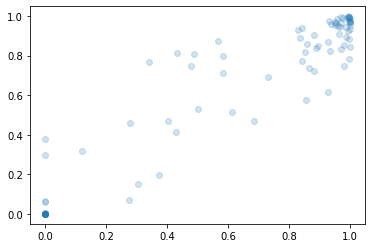

In [5]:
plt.plot(y, linear_result.predict(X), 'o', alpha=0.2);
